# Machine Learning for yfinance

## Machine learing using XGboost

In [7]:
# # import labraries
import yfinance as yf
import pandas as pd
import pandas_ta_classic as ta
import matplotlib.pyplot as plt
import seaborn
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

In [81]:
ticker='AAPL' 
date='2010-01-01'  # downloading and feature engineering
length2=[14,20,50]
df= yf.download(tickers=ticker,start=date)

# CRITICAL FIX: Flatten the MultiIndex columns
# This converts ('Close', 'AAPL') -> 'Close'
df.columns = df.columns.get_level_values(0)

# 2. Indicators - These will now work!
df.ta.macd(append=True) 
df.ta.bbands(append=True) 

for i in length2:
    df[f'SMA_{i}'] = ta.sma(df['Close'], length=i)
    df[f'EMA_{i}'] = ta.ema(df['Close'], length=i)
    df[f'RSI_{i}'] = ta.rsi(df['Close'], length=i)
    df[f'ATR_{i}'] = ta.atr(df['High'], df['Low'], df['Close'], length=i)

# 3. Predict & Train
# Instead of predicting the Price, predict the % Change
df['Target'] = df['Close'].pct_change().shift(-2) 

df.dropna(inplace=True)

print("Data Prepared Successfully!")
print(df.tail())

C:\Users\BAB AL SAFA\AppData\Local\Temp\ipykernel_14540\814926506.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df= yf.download(tickers=ticker,start=date)
[*********************100%***********************]  1 of 1 completed

Data Prepared Successfully!
Price            Close        High         Low        Open    Volume  \
Date                                                                   
2026-01-30  259.480011  261.899994  252.179993  255.169998  92443400   
2026-02-02  270.010010  270.489990  259.209991  260.029999  73913400   
2026-02-03  269.480011  271.880005  267.609985  269.200012  64394700   
2026-02-04  276.489990  278.950012  272.290009  272.290009  90545700   
2026-02-05  275.910004  279.500000  273.230011  278.130005  52977400   

Price       MACD_12_26_9  MACDh_12_26_9  MACDs_12_26_9   BBL_5_2.0  \
Date                                                                 
2026-01-30     -3.509315       0.979259      -4.488574  254.666084   
2026-02-02     -2.181855       1.845375      -4.027230  250.785574   
2026-02-03     -1.159237       2.294394      -3.453631  251.128015   
2026-02-04      0.214371       2.934402      -2.720031  252.962746   
2026-02-05      1.241849       3.169504      -1

In [82]:
df

Price,Close,High,Low,Open,Volume,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,BBL_5_2.0,BBM_5_2.0,...,ATR_14,SMA_20,EMA_20,RSI_20,ATR_20,SMA_50,EMA_50,RSI_50,ATR_50,Target
Date,,,,,,,,,,,,,,,,,,,,,
2010-03-17,6.721593,6.791472,6.696101,6.744986,450956800,0.174150,0.044157,0.129993,6.683966,6.745046,...,0.124048,6.384554,6.470960,65.425155,0.130663,6.212933,6.227054,58.302956,0.141879,-0.010684
2010-03-18,6.737490,6.747986,6.676308,6.720994,342109600,0.172876,0.034306,0.138569,6.681508,6.739948,...,0.120220,6.417124,6.496344,65.866832,0.127481,6.219093,6.247071,58.570646,0.139696,0.011248
2010-03-19,6.665509,6.755182,6.634918,6.741687,559445600,0.164165,0.020477,0.143689,6.662730,6.713855,...,0.120223,6.447985,6.512455,62.086557,0.127094,6.225859,6.263480,56.883353,0.139098,0.016062
2010-03-22,6.740486,6.777975,6.602527,6.612125,456419600,0.161451,0.014210,0.147241,6.663982,6.719314,...,0.124247,6.484469,6.534172,64.331137,0.129682,6.234358,6.282186,58.164337,0.140205,0.004423
2010-03-23,6.848753,6.861349,6.720991,6.767177,602431200,0.166122,0.015104,0.151017,6.623827,6.742766,...,0.125419,6.531405,6.564132,67.275922,0.130252,6.244184,6.304405,59.918944,0.140209,-0.011858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2026-01-30,259.480011,261.899994,252.179993,255.169998,92443400,-3.509315,0.979259,-4.488574,254.666084,257.576001,...,5.499270,257.649498,258.628894,46.665383,5.296580,268.295198,262.589017,50.723689,5.089793,-0.001963
2026-02-02,270.010010,270.489990,259.209991,260.029999,73913400,-2.181855,1.845375,-4.027230,250.785574,260.496002,...,5.912180,257.599498,259.712810,57.732781,5.595751,268.346599,262.880037,55.132225,5.213597,0.026013
2026-02-03,269.480011,271.880005,267.609985,269.200012,64394700,-1.159237,2.294394,-3.453631,251.128015,262.738007,...,5.794882,257.710498,260.643019,57.104964,5.529464,268.364999,263.138859,54.880057,5.194725,-0.002098


### Feature Selection & Train/Test Split

In [116]:
# We select the specific indicator columns created above
features = ['RSI_20', 'ATR_20', 'MACD_12_26_9','BBL_5_2.0','SMA_20','EMA_50'] # lets take this for now 
X = df[features]
y= df['Target']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, shuffle=False)

In [117]:
# 5. Scale for the Neural Network (MLP)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## lets use XGboost and neural network to find the target


In [119]:
# XGBOOST
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.05)
xgb_model.fit(X_train,y_train)

# neural network
mlp_model= MLPRegressor(hidden_layer_sizes=(64,16), max_iter=1000)
mlp_model.fit(X_train_scaled, y_train)

,loss,'squared_error'
,hidden_layer_sizes,"(64, ...)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,1000
,shuffle,True


In [120]:
# predict Tomorrow
last_row = X.tail(1)
last_row_scaled = scaler.transform(last_row)
predictedxgb = xgb_model.predict(last_row)
predictNN = mlp_model.predict(last_row_scaled)
Current_Price= df['Close'].iloc[-1]
print(f"Current Price: {df['Close'].iloc[-1]:.2f}")
print(f"XGBoost Prediction: {xgb_model.predict(last_row)[0]:.2f}")
print(f"Neural Network Prediction: {mlp_model.predict(last_row_scaled)[0]:.2f}")


Current Price: 275.91
XGBoost Prediction: -0.01
Neural Network Prediction: -0.08


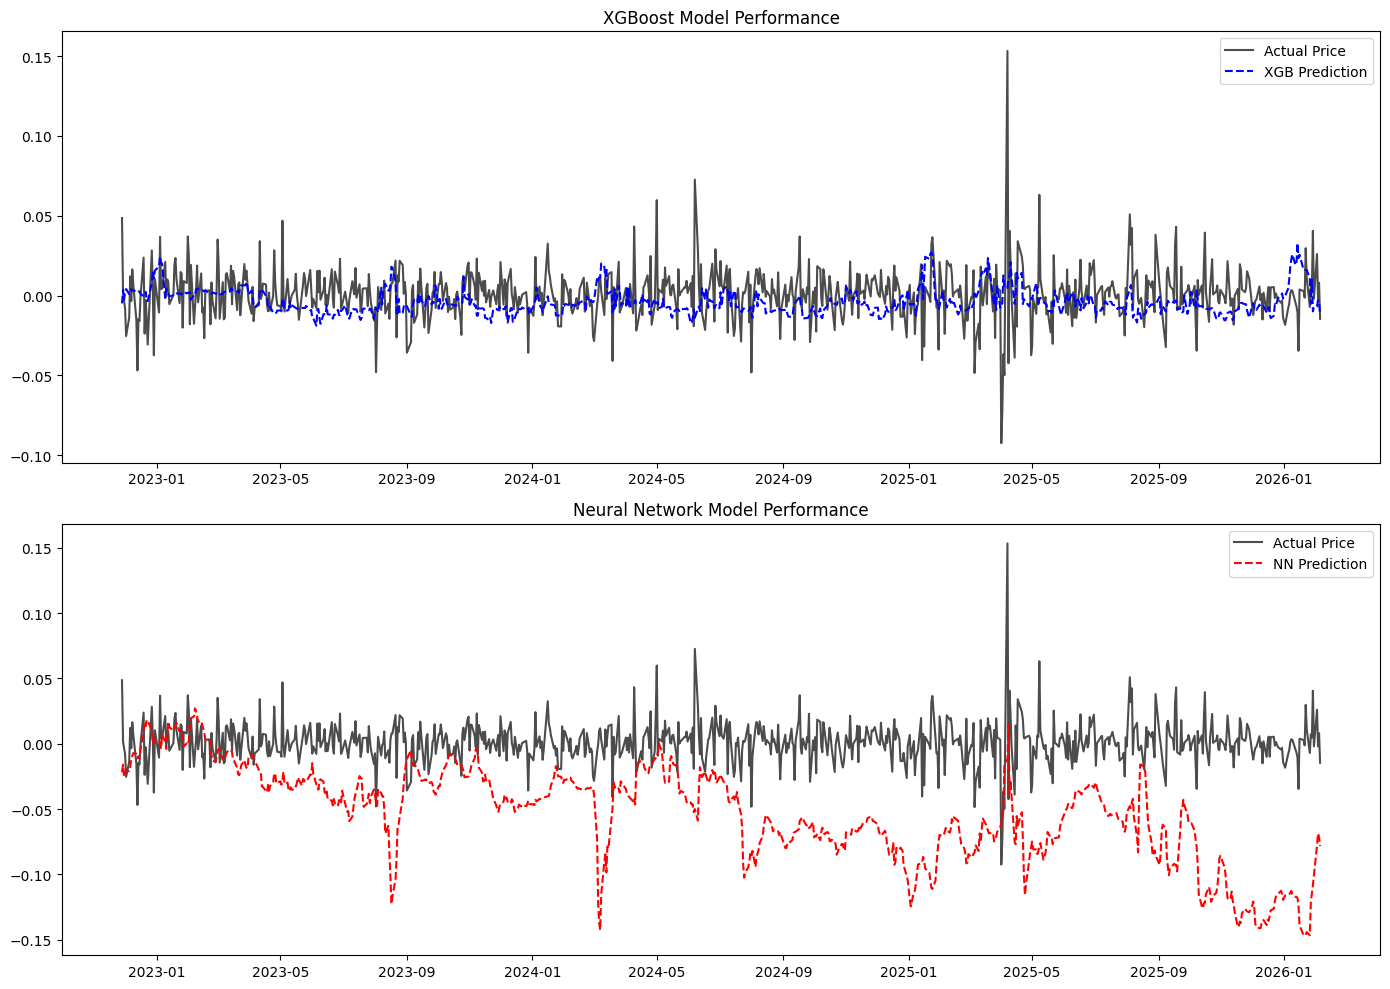

In [121]:
# 1. Generate predictions for the WHOLE test set (this creates 800 predictions)
test_predictions_xgb = xgb_model.predict(X_test)
test_predictions_nn = mlp_model.predict(X_test_scaled)

# 2. Create the Graph
plt.figure(figsize=(14, 10))

# --- XGBOOST GRAPH ---
plt.subplot(2, 1, 1)
# X-axis: y_test.index (dates), Y-axis: y_test.values (actual prices)
plt.plot(y_test.index, y_test.values, label="Actual Price", color='black', alpha=0.7)
# X-axis: y_test.index (dates), Y-axis: test_predictions_xgb (the 800 predictions)
plt.plot(y_test.index, test_predictions_xgb, label="XGB Prediction", color='blue', linestyle='--')
plt.title("XGBoost Model Performance")
plt.legend()

# --- NEURAL NETWORK GRAPH ---
plt.subplot(2, 1, 2)
plt.plot(y_test.index, y_test.values, label="Actual Price", color='black', alpha=0.7)
plt.plot(y_test.index, test_predictions_nn, label="NN Prediction", color='red', linestyle='--')
plt.title("Neural Network Model Performance")
plt.legend()

plt.tight_layout()
plt.show()


In [122]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Generate predictions for the test set
xgb_preds = xgb_model.predict(X_test)
nn_preds = mlp_model.predict(X_test_scaled)

def print_metrics(name, real, pred):
    mae = mean_absolute_error(real, pred)
    rmse = np.sqrt(mean_squared_error(real, pred))
    r2 = r2_score(real, pred)
    
    print(f"--- {name} Performance ---")
    print(f"Mean Absolute Error (MAE): ${mae:.2f}")
    print(f"Root Mean Squared Error (RMSE): ${rmse:.2f}")
    print(f"R-Squared Score: {r2:.4f}\n")

# Run the evaluation
print_metrics("XGBoost", y_test, xgb_preds)
print_metrics("Neural Network", y_test, nn_preds)


--- XGBoost Performance ---
Mean Absolute Error (MAE): $0.01
Root Mean Squared Error (RMSE): $0.02
R-Squared Score: -0.2690

--- Neural Network Performance ---
Mean Absolute Error (MAE): $0.06
Root Mean Squared Error (RMSE): $0.07
R-Squared Score: -15.8938



In [123]:
def directional_accuracy(real, pred):
    # Check if the predicted change and actual change have the same sign
    real_direction = np.sign(real.diff().dropna())
    pred_direction = np.sign(pd.Series(pred).diff().dropna())
    
    accuracy = (real_direction.values == pred_direction.values).mean()
    return accuracy * 100

print(f"XGBoost Directional Accuracy: {directional_accuracy(y_test, xgb_preds):.2f}%")
print(f"NN Directional Accuracy: {directional_accuracy(y_test, nn_preds):.2f}%")


XGBoost Directional Accuracy: 46.06%
NN Directional Accuracy: 48.56%


In [124]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, r2_score

# 1. Initialize the new models
lr_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
svr_model = SVR(kernel='rbf', C=1e3, gamma=0.1)

# 2. Train the models
lr_model.fit(X_train_scaled, y_train)
rf_model.fit(X_train, y_train) # Trees don't need scaling
svr_model.fit(X_train_scaled, y_train)

# 3. Generate Predictions
lr_preds = lr_model.predict(X_test_scaled)
rf_preds = rf_model.predict(X_test)
svr_preds = svr_model.predict(X_test_scaled)

# 4. Compare All Models
models = {
    "Linear Regression": lr_preds,
    "Random Forest": rf_preds,
    "SVR": svr_preds,
    "XGBoost": xgb_preds,
    "Neural Network": nn_preds
}

print(f"{'Model':<20} | {'MAE':<10} | {'R2 Score':<10}")
print("-" * 45)
for name, preds in models.items():
    mae = mean_absolute_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    print(f"{name:<20} | ${mae:<9.2f} | {r2:<10.4f}")


Model                | MAE        | R2 Score  
---------------------------------------------
Linear Regression    | $0.01      | -0.0135   
Random Forest        | $0.01      | -0.3152   
SVR                  | $0.04      | -8.0679   
XGBoost              | $0.01      | -0.2690   
Neural Network       | $0.06      | -15.8938  


In [125]:
def directional_accuracy(real, pred):
    # Check if the predicted change and actual change have the same sign
    real_direction = np.sign(real.diff().dropna())
    pred_direction = np.sign(pd.Series(pred).diff().dropna())
    
    accuracy = (real_direction.values == pred_direction.values).mean()
    return accuracy * 100

print(f"Linear Regression Directional Accuracy: {directional_accuracy(y_test, lr_preds):.2f}%")
print(f"XGBoost Directional Accuracy: {directional_accuracy(y_test, xgb_preds):.2f}%")
print(f"SVR Directional Accuracy: {directional_accuracy(y_test, svr_preds):.2f}%")
print(f"Random forest Directional Accuracy: {directional_accuracy(y_test, rf_preds):.2f}%")
print(f"NN Directional Accuracy: {directional_accuracy(y_test, nn_preds):.2f}%")

Linear Regression Directional Accuracy: 49.81%
XGBoost Directional Accuracy: 46.06%
SVR Directional Accuracy: 54.32%
Random forest Directional Accuracy: 49.31%
NN Directional Accuracy: 48.56%


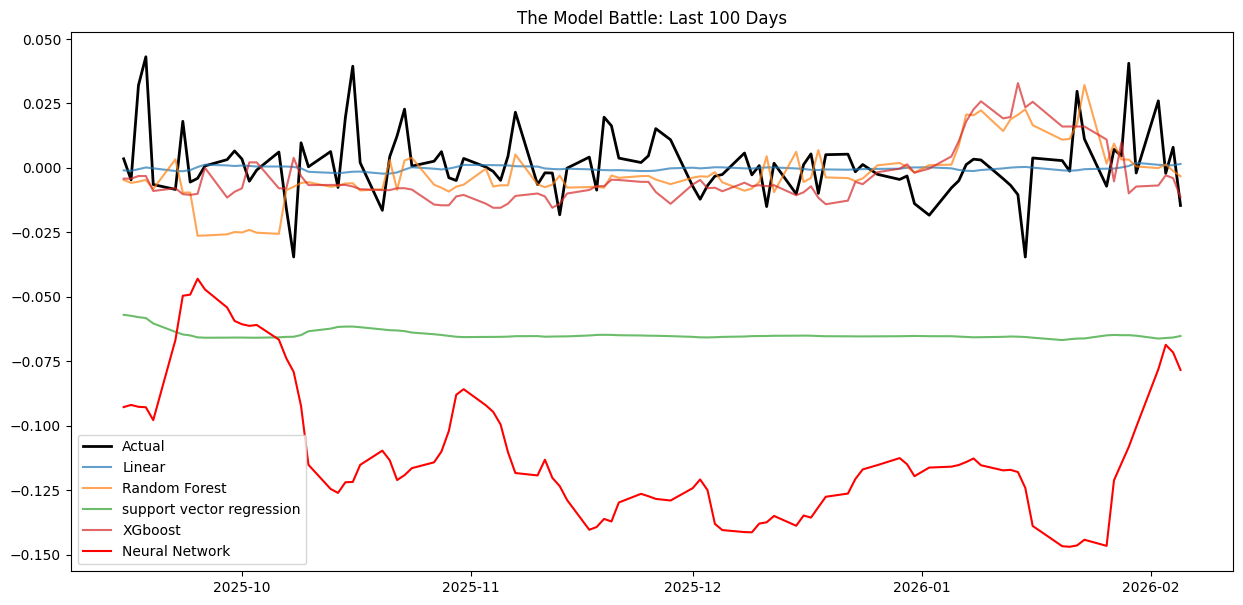

In [126]:
plt.figure(figsize=(15, 7))
plt.plot(y_test.index[-100:], y_test.values[-100:], label="Actual", color='black', linewidth=2)
plt.plot(y_test.index[-100:], lr_preds[-100:], label="Linear", alpha=0.7)
plt.plot(y_test.index[-100:], rf_preds[-100:], label="Random Forest", alpha=0.7)
plt.plot(y_test.index[-100:], svr_preds[-100:], label="support vector regression", alpha=0.7)
plt.plot(y_test.index[-100:], xgb_preds[-100:], label="XGboost", alpha=0.7)
plt.plot(y_test.index[-100:], nn_preds[-100:], label="Neural Network", color='red')

plt.title("The Model Battle: Last 100 Days")
plt.legend()
plt.show()


In [127]:
# Create an Ensemble Prediction (Simple Average of the top 3)
ensemble_preds = (svr_preds + rf_preds + nn_preds) / 3

# Calculate Directional Accuracy for the Ensemble
real_direction = np.sign(y_test.diff().dropna())
ens_direction = np.sign(pd.Series(ensemble_preds).diff().dropna())
ens_acc = (real_direction.values == ens_direction.values).mean() * 100

print(f"Voting Ensemble Directional Accuracy: {ens_acc:.2f}%")


Voting Ensemble Directional Accuracy: 48.19%


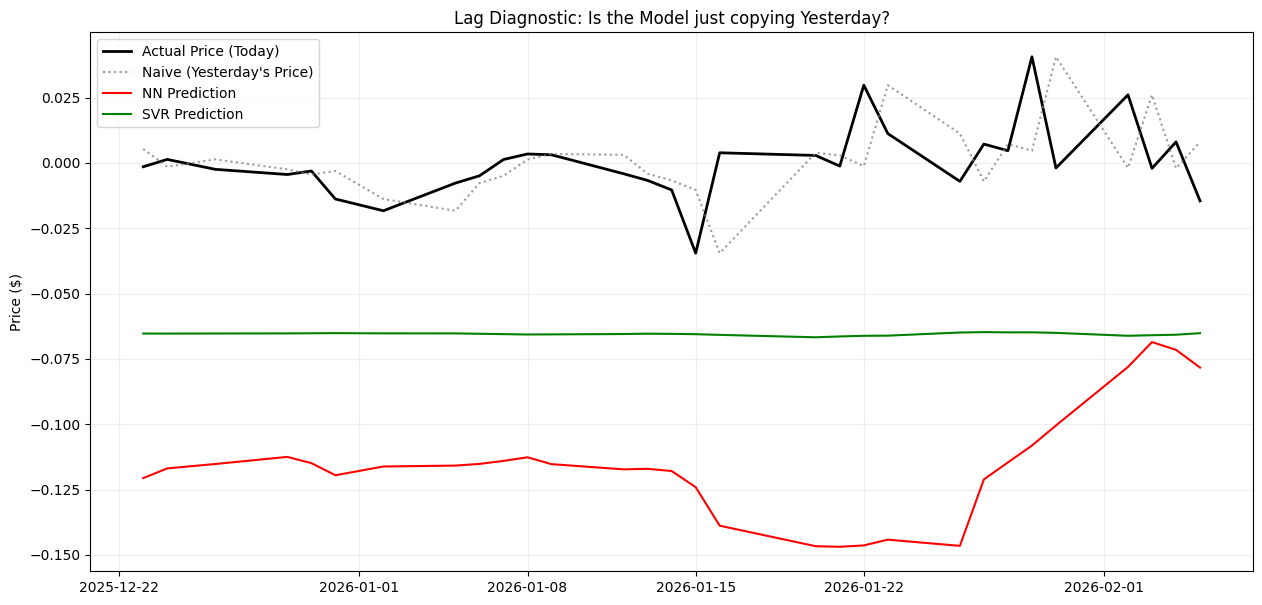

Correlation with Today: 0.0071
Correlation with Yesterday: 0.0283


In [128]:
import matplotlib.pyplot as plt

# 1. Create the Naive "Yesterday" Baseline
# We shift the actual test prices by 1 to represent a 'persistence' forecast
naive_preds = y_test.shift(1).iloc[1:]
actual_v = y_test.iloc[1:]
nn_v = nn_preds[1:]  # Adjusting lengths to match the shift
svr_v = svr_preds[1:]

# 2. Plotting the Comparison (Zoomed to 30 days for clarity)
plt.figure(figsize=(15, 7))

plt.plot(actual_v.index[-30:], actual_v[-30:], label="Actual Price (Today)", color='black', linewidth=2)
plt.plot(actual_v.index[-30:], naive_preds[-30:], label="Naive (Yesterday's Price)", color='grey', linestyle=':', alpha=0.8)
plt.plot(actual_v.index[-30:], nn_v[-30:], label="NN Prediction", color='red', linewidth=1.5)
plt.plot(actual_v.index[-30:], svr_v[-30:], label="SVR Prediction", color='green', linewidth=1.5)

plt.title("Lag Diagnostic: Is the Model just copying Yesterday?")
plt.ylabel("Price ($)")
plt.legend()
plt.grid(True, alpha=0.2)
plt.show()

# 3. The Statistical "Lag" Test
from scipy.stats import pearsonr
corr_with_today, _ = pearsonr(nn_v, actual_v)
corr_with_yesterday, _ = pearsonr(nn_v, naive_preds)

print(f"Correlation with Today: {corr_with_today:.4f}")
print(f"Correlation with Yesterday: {corr_with_yesterday:.4f}")


In [130]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Tuning Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), 
                           param_grid=param_grid, 
                           cv=3, 
                           scoring='neg_mean_absolute_error',
                           verbose=0,
                           n_jobs=-1)

# Fit the grid search to your training data (X_train, y_train)
grid_search.fit(X_train, y_train)
print(f"Best RF Params: {grid_search.best_params_}")


Best RF Params: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 100}


In [133]:

from sklearn.ensemble import RandomForestRegressor

# Using the parameters found by GridSearchCV
rf_model = RandomForestRegressor(
    n_estimators=100, 
    max_depth=5, 
    min_samples_split=2, 
    random_state=42 # Keep the random state for reproducibility
)

# Now fitting the model again using this optimized instance
rf_model.fit(X_train, y_train)
y_pred_rf =rf_model.predict(X_test)

print(f"predicted: {y_pred_rf}")


predicted: [-1.24916523e-04  8.39400333e-04 -9.40445678e-04 -9.30242931e-05
  1.30820096e-03  1.28052730e-03  1.82001594e-04  8.34627305e-04
  7.30609886e-04  1.14236222e-03  9.55340005e-04  6.66523260e-04
  7.97637931e-04  1.12613156e-03  1.44168322e-03  1.37041991e-04
 -1.00786085e-04  3.24055025e-04  1.04770378e-04  5.22926013e-04
  1.30459829e-03  6.68470100e-03  3.38891761e-03  3.12142809e-03
  4.78498664e-03  4.18171727e-03  1.64349027e-03  3.56958081e-03
  3.99758838e-03  1.16337008e-03  5.18266097e-04  9.36145416e-04
 -4.61728121e-04  6.90181578e-04  2.36558248e-03  1.22905955e-03
  8.73450222e-04  9.79509324e-04  9.79509324e-04  9.79509324e-04
  1.22955011e-03  1.27046621e-03  1.20637958e-03  1.26341589e-03
  1.20637958e-03  1.25876118e-03  1.15219781e-03  1.35322372e-03
  1.35322372e-03  1.35322372e-03  1.35322372e-03  1.35322372e-03
  1.35322372e-03  1.35322372e-03  1.35322372e-03  1.35322372e-03
  1.01513315e-03  1.03520224e-03  1.31579749e-03  1.31579749e-03
  1.11561899e-

# Full code

C:\Users\BAB AL SAFA\AppData\Local\Temp\ipykernel_14540\2087458212.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(tickers=ticker, start=date)
[*********************100%***********************]  1 of 1 completed


Model                          | MAE        | R2 Score   | Direction Acc. 
---------------------------------------------------------------------------
Linear Regression              | 0.0123 | -0.1520 | 58.82          %
Random Forest (Optimized)      | 0.0127 | -0.2076 | 50.56          %
SVR                            | 0.0117 | -0.0574 | 57.57          %
XGBoost                        | 0.0142 | -0.4072 | 53.69          %
Neural Network                 | 0.0728 | -30.8595 | 55.07          %


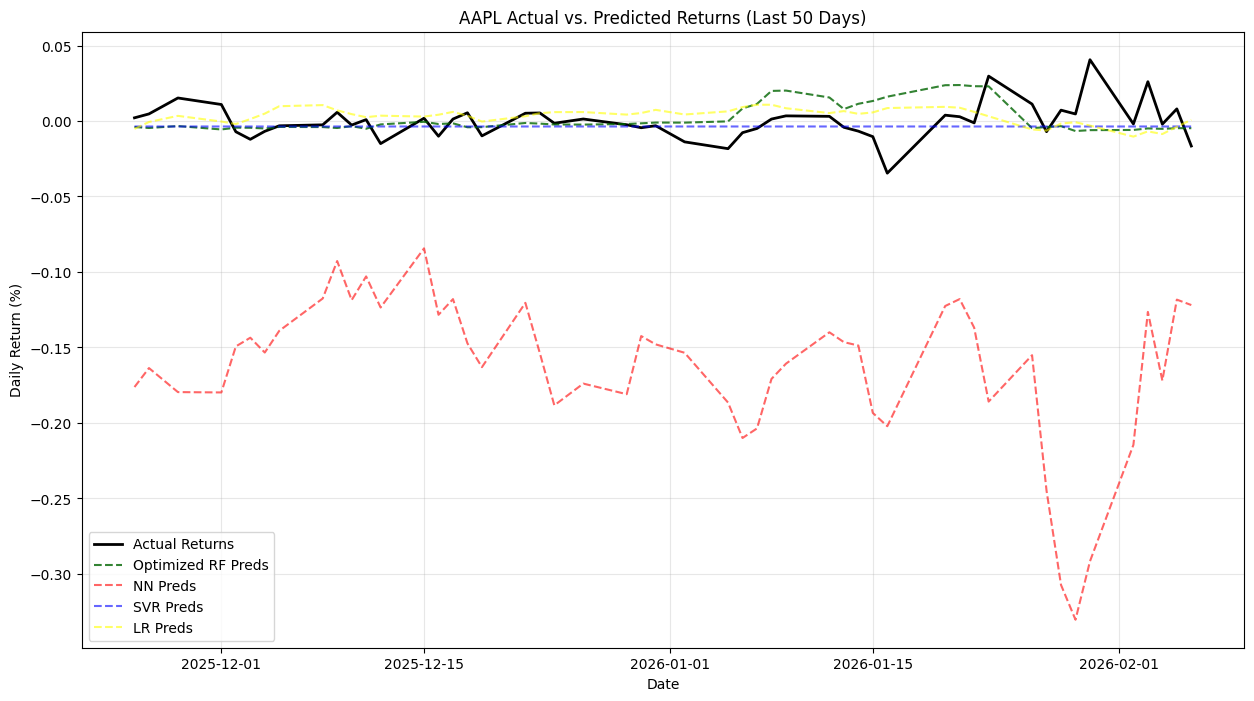

In [142]:
import yfinance as yf
import pandas as pd
import pandas_ta_classic as ta
import numpy as np
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt # <-- Added import for plotting

ticker = 'AAPL' 
date = '2010-01-01'
length2 = [5,10,15,20,25,50]

# 1. Download Data (Using the fix to avoid the MultiIndex Error)
df = yf.download(tickers=ticker, start=date)

df.columns = df.columns.get_level_values(0)

# 2. Indicators - These will now work!
df.ta.macd(append=True) 
df.ta.bbands(append=True)

for i in length2:
    df[f'SMA_{i}'] = ta.sma(df['Close'], length=i)
    df[f'EMA_{i}'] = ta.ema(df['Close'], length=i)
    df[f'RSI_{i}'] = ta.rsi(df['Close'], length=i)
    df[f'ATR_{i}'] = ta.atr(df['High'], df['Low'], df['Close'], length=i)

# 3. Create Target (Predicting the next day's PERCENTAGE CHANGE) & Clean
df['Target'] = df['Close'].pct_change().shift(-1) # <-- Predicting Returns
df.dropna(inplace=True)

# 4. Feature Selection & Train/Test Split
features = [col for col in df.columns if col not in ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Target']]
X = df[features]
y = df['Target']

split = int(len(df) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# 5. Scaling (Required for NN, SVR, Linear)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Train All Models (Using your optimized RF params)
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.05)
lr_model = LinearRegression()
# OPTIMIZED RANDOM FOREST
rf_model = RandomForestRegressor(n_estimators=100, max_depth=5, min_samples_split=2, random_state=42)
svr_model = SVR(kernel='rbf') # SVR needs tuning if performance is poor
mlp_model = MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)

xgb_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
lr_model.fit(X_train_scaled, y_train)
svr_model.fit(X_train_scaled, y_train)
mlp_model.fit(X_train_scaled, y_train)

# 7. Generate Predictions for the Test Set
models = {
    "Linear Regression": lr_model.predict(X_test_scaled),
    "Random Forest (Optimized)": rf_model.predict(X_test),
    "SVR": svr_model.predict(X_test_scaled),
    "XGBoost": xgb_model.predict(X_test),
    "Neural Network": mlp_model.predict(X_test_scaled)
}

# 8. Print Metrics Leaderboard
def directional_accuracy(real, pred):
    real_direction = np.sign(real.diff().dropna())
    pred_direction = np.sign(pd.Series(pred, index=real.index).diff().dropna())
    return (real_direction.values == pred_direction.values).mean() * 100

print(f"{'Model':<30} | {'MAE':<10} | {'R2 Score':<10} | {'Direction Acc.':<15}")
print("-" * 75)
for name, preds in models.items():
    mae = mean_absolute_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    direction_acc = directional_accuracy(y_test, preds)
    print(f"{name:<30} | {mae:<1.4f} | {r2:<1.4f} | {direction_acc:<15.2f}%")

# 9. GRAPHING THE PERFORMANCE (Last 50 days)
plt.figure(figsize=(15, 8))
plt.title(f'{ticker} Actual vs. Predicted Returns (Last 50 Days)')

# Plot Actual Returns
plt.plot(y_test.index[-50:], y_test.values[-50:], label="Actual Returns", color='black', linewidth=2)

# Plot Predictions for key models
plt.plot(y_test.index[-50:], models["Random Forest (Optimized)"][-50:], label="Optimized RF Preds", color='darkgreen', linestyle='--', alpha=0.8)
plt.plot(y_test.index[-50:], models["Neural Network"][-50:], label="NN Preds", color='red', linestyle='--', alpha=0.6)
plt.plot(y_test.index[-50:], models["SVR"][-50:], label="SVR Preds", color='blue', linestyle='--', alpha=0.6)
plt.plot(y_test.index[-50:], models["Linear Regression"][-50:], label="LR Preds", color='yellow', linestyle='--', alpha=0.6)


plt.ylabel("Daily Return (%)")
plt.xlabel("Date")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()
